# Классификация писателей

##Импорт библиотек

Начните с подключения необходимых библиотек и модулей. В ходе занятия вы подробнее
разберете их назначение:

In [ ]:
# Работа с массивами данных
import numpy as np
import matplotlib.pyplot as plt
# Функции-утилиты для работы с категориальными данными
from tensorflow.keras import utils

# Класс для конструирования последовательной модели нейронной сети
from tensorflow.keras.models import Sequential

# Основные слои
from tensorflow.keras.layers import Dense, Dropout, SpatialDropout1D, BatchNormalization, Embedding, Flatten, Activation

# Токенизатор для преобразование текстов в последовательности
from tensorflow.keras.preprocessing.text import Tokenizer

# Матрица ошибок классификатора
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Загрузка датасетов из облака google
import gdown

# Функции операционной системы
import os

# Работа со временем
import time

# Регулярные выражения
import re

# Запись в файлы и чтение из файлов структур данных Python
import pickle

# Отрисовка графиков
import matplotlib.pyplot as plt
plt.style.use('ggplot')

Код ниже поможет добавить ваш личный Google Диск в директорию ноутбука, т.е. вы
сможете загрузить сторонние файлы (тексты).

##Загрузка датасета и подготовка данных

`gdown.download()` – непосредственный способ загрузить файлы по ссылке.

В данном случае вы загрузите архив с текстами определенных писателей.

In [ ]:
# Загрузка датасета из облака
gdown.download('https://storage.yandexcloud.net/aiueducation/Content/base/l7/writers.zip', None, quiet=True)
!unzip -q writers.zip -d writers
!rm -r sample_data writers.zip

In [ ]:
def readText(fileName): # Объявляем функции для чтения файла. На вход отправляем путь к файлу
  with open(fileName, 'r') as f:
    text = f.read()
    text = text.replace('\n', ' ')

  return text                    # Возвращаем текст файла


text_1 = readText('/content/writers/(Булгаков) Обучающая_5 вместе.txt')
text_1[:500]

'\ufeffБелая гвардия   Посвящается[1]  Любови Евгеньевне Белозерской[2]  Пошел мелкий снег и вдруг повалил хло-  пьями. Ветер завыл; сделалась метель.  В одно мгновение темное небо смешалось с  снежным морем. Все исчезло.  — Ну, барин, — закричал ямщик, — беда:  буран![3]  «Капитанская дочка»  И судимы были мертвые[4] по написанному  в книгах сообразно с делами своими.  Велик был год и страшен год по Рождестве Христовом 1918, от начала же революции второй[5]. Был он обилен летом солнцем, а зимою снего'

In [ ]:
text = '/content/writers/(Булгаков) Обучающая_5 вместе.txt'

re.findall(r'((?<=[(])\w.+(?=[)]))', text)

['Булгаков']

In [ ]:
lst = []
for i in os.listdir('writers'):
  lst.append(re.findall(r'((?<=[(])[А-я].+(?=[)]))', i)[0])

writers = sorted(list(set(lst)))
ClassCount = len(writers)

print(writers)
print(ClassCount)

['Булгаков', 'Клиффорд_Саймак', 'Макс Фрай', 'О. Генри', 'Рэй Брэдберри', 'Стругацкие']
6


In [ ]:
for name in os.listdir('writers'):
  print(name)

(Макс Фрай) Обучающая_5 вместе.txt
(Булгаков) Тестовая_2 вместе.txt
(О. Генри) Тестовая_20 вместе.txt
(Булгаков) Обучающая_5 вместе.txt
(Стругацкие) Тестовая_2 вместе.txt
(О. Генри) Обучающая_50 вместе.txt
(Клиффорд_Саймак) Обучающая_5 вместе.txt
(Рэй Брэдберри) Тестовая_8 вместе.txt
(Рэй Брэдберри) Обучающая_22 вместе.txt
(Клиффорд_Саймак) Тестовая_2 вместе.txt
(Макс Фрай) Тестовая_2 вместе.txt
(Стругацкие) Обучающая_5 вместе.txt


In [ ]:
for name in os.listdir('writers'):
  if writers[0] in name:
    print(name)

(Булгаков) Тестовая_2 вместе.txt
(Булгаков) Обучающая_5 вместе.txt


In [ ]:
train_text = []
test_text = []

count_test = 0
count_train = 0

for name in writers:
  for path in os.listdir('writers'):
    if name in path:
      if 'Обучающая' in path:
        print(f'Обучающая добавлена для {name}[{count_train}]')
        train_text.append(readText(f'writers/{path}'))
        count_train += 1

      else:
        print(f'Тестовая добавлена для {name}[{count_test}]')
        test_text.append(readText(f'writers/{path}'))
        count_test += 1

  print('-'*100)

Обучающая добавлена для Булгаков[0]
Тестовая добавлена для Булгаков[0]
----------------------------------------------------------------------------------------------------
Тестовая добавлена для Клиффорд_Саймак[1]
Обучающая добавлена для Клиффорд_Саймак[1]
----------------------------------------------------------------------------------------------------
Обучающая добавлена для Макс Фрай[2]
Тестовая добавлена для Макс Фрай[2]
----------------------------------------------------------------------------------------------------
Тестовая добавлена для О. Генри[3]
Обучающая добавлена для О. Генри[3]
----------------------------------------------------------------------------------------------------
Обучающая добавлена для Рэй Брэдберри[4]
Тестовая добавлена для Рэй Брэдберри[4]
----------------------------------------------------------------------------------------------------
Тестовая добавлена для Стругацкие[5]
Обучающая добавлена для Стругацкие[5]
---------------------------------------

In [ ]:
print('>>', writers[0])
print('>>', train_text[0][:100])

>> Булгаков
>> ﻿Белая гвардия   Посвящается[1]  Любови Евгеньевне Белозерской[2]  Пошел мелкий снег и вдруг повалил


In [ ]:
# Проверка загрузки: вывод начальных отрывков из каждого класса
for cls in range(ClassCount):
    print(f'Класс: {writers[cls]}[{cls}]')
    print(f'  train: {train_text[cls][:200]}')
    print(f'  test : {test_text[cls][:200]}')
    print()

Класс: Булгаков[0]
  train: ﻿Белая гвардия   Посвящается[1]  Любови Евгеньевне Белозерской[2]  Пошел мелкий снег и вдруг повалил хло-  пьями. Ветер завыл; сделалась метель.  В одно мгновение темное небо смешалось с  снежным море
  test : ﻿Дон Кихот ДЕЙСТВУЮЩИЕ ЛИЦА Алонсо Кихано, он же Дон Кихот Ламанчский.  Антония – его племянница.  Ключница Дон Кихота.  Санчо Панса – оруженосец Дон Кихота.  Перо Перес – деревенский священник, лицен

Класс: Клиффорд_Саймак[1]
  train: ﻿Всё живое...     Когда я выехал из нашего городишка и повернул на шоссе, позади оказался грузовик. Этакая тяжелая громадина с прицепом, и неслась она во весь дух. Шоссе здесь срезает угол городка, и 
  test : ﻿Зачарованное паломничество    1  Гоблин со стропил следил за прячущимся монахом, который шпионил за ученым. Гоблин ненавидел монаха и имел для этого все основания. Монах никого не ненавидел и не люби

Класс: Макс Фрай[2]
  train: ﻿Власть несбывшегося   – С тех пор как меня угораздило побывать в этой грешной Черха

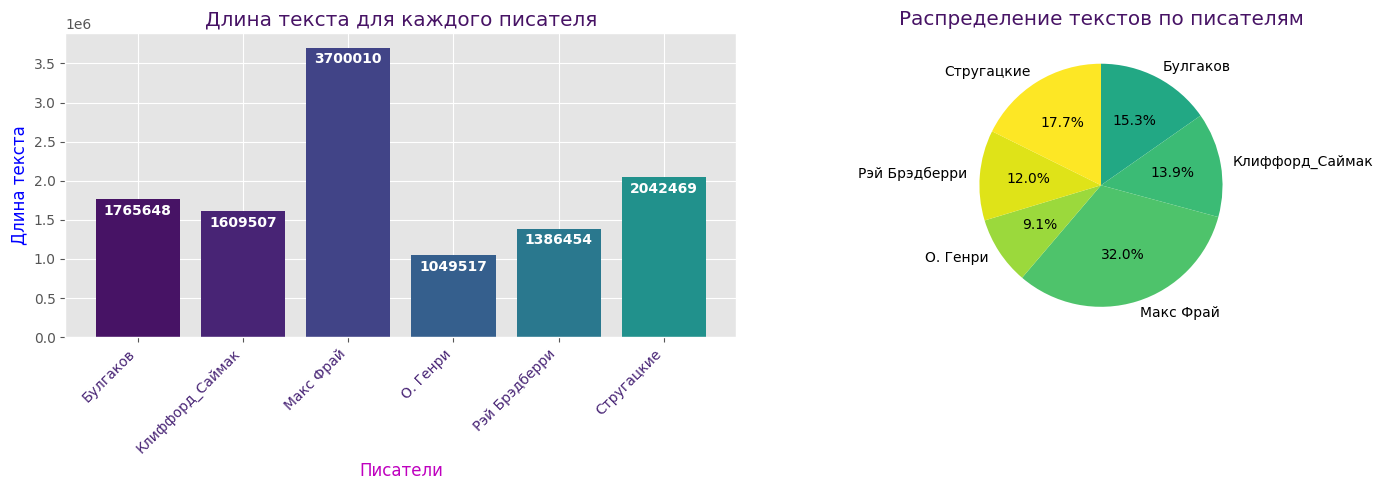

In [ ]:
# @title статистика
# Создаем bar-график с разными цветами для каждого столбца
color_lst = [0.05 , 0.1, 0.2, 0.3, 0.4, 0.5 ]
colors = plt.cm.viridis(color_lst)

color_lst2 = [0.6, 0.68, 0.72, 0.85, 0.95, 1. ]
colors2 = plt.cm.viridis(color_lst2)


# Список с длиной текста
text_lengths = list(map(len, train_text))

plt.figure(figsize=(15, 5))

# bar
plt.subplot(1, 2, 1)  # Один ряд, две колонки, первый график
plt.bar(writers, text_lengths, color=colors)
for i, count in enumerate(text_lengths):
    plt.text(i, count - 200000, str(count), ha='center', color='white', fontweight='bold')
plt.xticks(rotation=45, ha='right', color=colors[1])
plt.xlabel('Писатели', color='m')
plt.ylabel('Длина текста', color='b')
plt.title('Длина текста для каждого писателя', color=colors[0])

# pie
plt.subplot(1, 2, 2)  # Один ряд, две колонки, второй график
plt.pie(text_lengths, labels=writers, colors=colors2, autopct='%1.1f%%', startangle=90, counterclock=False)
plt.title('Распределение текстов по писателям', color=colors[0])

# Регулируем расположение графиков
plt.tight_layout()

# Покажем графики
plt.show()


Теперь вы узнаете, как превратить текст из последовательного набора слов в
последовательный набор чисел.

###Токенизатор Keras и техника преобразования текста в числовые и векторные представления

Для демонстрации создайте список с набором слов (у вас – числительных), сохраните его
в **sample_text**.

***Tokenizer*** – встроенный класс библиотеки, созданный разработчиками Keras. Он поможет
выделить часть из начального образца текста и составить по нему словарь частоты
повторений слов в образце.

Обратите внимание на несколько важных параметров:

● **num_words** – лимит в 5 слов из общего числа слов в тексте (считайте это за размер
образца);

● **filters** – все символы, которые вы удалите из текста (в sample_text их нет,
но они могут быть в любом другом тексте);

● **oov_token** – здесь вы задаете произвольное имя для каждого слова, что будет
иметь индекс выше вашего лимита, т.е. не входить в образец для словаря (в
примере лимит равен 5).

Дополнительно в комментариях к коду ниже вы можете увидеть описание и других
параметров Tokenizer.

In [ ]:
sample_text = ['один два две двум двум двум три четыре пять два Три три четыре четыре четыре пять пять пять пять шесть семь восемь']

# Используется встроенный в Keras токенизатор для разбиения текста и построения частотного словаря
tokenizer = Tokenizer(num_words=5, filters='!"#$%&()*+,-–—./…:;<=>?@[\\]^_`{|}~«»\t\n\xa0\ufeff', lower=True, split=' ', oov_token='неизвестное_слово', char_level=False)
# Использованы параметры:
# num_words   - объем словаря
# filters     - убираемые из текста ненужные символы
# lower       - приведение слов к нижнему регистру
# split       - разделитель слов
# char_level  - указание разделять по словам, а не по единичным символам
# oov_token   - токен для слов, которые не вошли в словарь

# Построение частотного словаря по текстам
tokenizer.fit_on_texts(sample_text)

Упомянутый ранее менеджер `with` сохранит полученный словарь в файл **f**.

Параметр "wb" – сокращение от двух слов write и binary. Он записывает словарь индексов
и дает компьютеру возможность читать его в виде бинарного кода.

In [ ]:
# Сохранение объекта-токенизатора в файл, для чтения используется pickle.dump()
with open('tokenizer.pickle', 'wb') as f:
    pickle.dump(tokenizer, f)

Так как в вашем случае переменная **sample_text** содержит список из одной строки, а не
нескольких, то обращаться к содержимому вы можете только через индекс 0.

Функция `len()` считает количество элементов – слов в тексте, в чем ей также помогает
команда деления строчных элементов `split()`. В образце текста количество слов равно
18.

In [ ]:
# Всего слов в тексте
print(len(sample_text[0].split()))

22


Метод `word_index` для словаря частотности выводит все пары по типу:
«Слово: индекс частоты повторений слова».

> Важно: помните, что чем выше такой индекс слова, тем реже оно повторяется в тексте, а не наоборот.

Не смущайтесь от индекса 1 для всех незнакомых слов: как вы помните, данный индекс
получают все слова, которые просто не вошли в заданный лимит словаря.

In [ ]:
# Словарь токенизатора с индексами слов
tokenizer.word_index

{'неизвестное_слово': 1,
 'пять': 2,
 'четыре': 3,
 'двум': 4,
 'три': 5,
 'два': 6,
 'один': 7,
 'две': 8,
 'шесть': 9,
 'семь': 10,
 'восемь': 11}

Добавление команды `items()` к предыдущему коду объединит уже выведенные пары в
кортежи – такие пары, которые вы уже не можете изменить. Они сохраняются вместе до
конца выполнения кода.

In [ ]:
# Представление словаря в виде списка пар (слово, индекс)
list(tokenizer.word_index.items())

[('неизвестное_слово', 1),
 ('пять', 2),
 ('четыре', 3),
 ('двум', 4),
 ('три', 5),
 ('два', 6),
 ('один', 7),
 ('две', 8),
 ('шесть', 9),
 ('семь', 10),
 ('восемь', 11)]

И вот ваш первый шаг на пути к обучению сети после составления словаря частотности:
преобразуйте исходный словарь с текстом в последовательность индексов слов. В этом
поможет функция `texts_to_sequences()`:

In [ ]:
sample_text = ['один трем два три четыре пять два два Три три четыре четыре четыре пять пять пять пять шесть семь восемь']

In [ ]:
# Представление исходного текста в виде последовательности индексов слов
sample_seq = tokenizer.texts_to_sequences(sample_text)
print(sample_seq)
print(len(sample_seq[0]))

[[1, 1, 1, 1, 3, 2, 1, 1, 1, 1, 3, 3, 3, 2, 2, 2, 2, 1, 1, 1]]
20


Достигнув этого блока кода, вы уже познакомились с существенной частью занятия!
Дальше представлен полезный способ выполнения цикла `for` в одну строку. При этом
такой цикл можно выполнить сразу внутри определенной структуры данных и получить
ее как результат. Здесь используется список: вы размещаете однострочный цикл `for`
внутри квадратных скобок.

Рассмотрите подробнее, что представлено в данном коде:
1. Создана переменная **x_train**, и в нее записан список.
2. Внутри списка размещен цикл `for` в одну строку.
3. Цикл организован следующим образом:

    * все до команды `for` – та операция, которую необходимо выполнить с
каждым элементом списка **sample_seq** (здесь – выделить каждые три
элемента последовательно);

    * далее сама команда `for` для каждого элемента i;

    * потом диапазон выполнения `range()` – от первого элемента в
**sample_seq** до последнего (`len(sample_seq[0])`) и число 3 – шаг
перемещения по диапазону.

Что вам это даст? Как вы узнали в начале занятия, нейронная сеть должна обучаться на
ряде примеров, а не на одном. Таким циклом вы и делите список индексов **sample_seq**
на несколько подвыборок. Если всего в **sample_seq** 18 слов (индексов слов), то при
шаге равном 3 вы получите количество выборок для обучения равное 18:3, т.е. 6 штук.

Выведите новый список **x_train** и посмотрите, действительно ли он содержит 6
подвыборок:

In [ ]:
# Выборка получается разбивкой последовательности индексов на отрезки (подпоследовательности) по несколько индексов каждый
# В общем случае отрезки могут частично накладываться друг на друга или отстоять на некотором расстоянии

x_train = [sample_seq[0][i:i + 3] for i in range(0, len(sample_seq[0]), 3)]

x_train

[[1, 1, 1], [1, 3, 2], [1, 1, 1], [1, 3, 3], [3, 2, 2], [2, 2, 1], [1, 1]]

Все верно!

Кстати, вы часто будете пользоваться таким способом размещения цикла в списке в одну
строку. Это очень удобно, и упрощает чтение кода, если только во всем разобраться.

Вот вы и дошли до метода преобразования списка из индексов слов в матрицу Bag Of
Words – способа обработки текста, который вы разбирали в начале занятия.
Преобразование списка индексов в Bag Of Words происходит за счет метода
`sequences_to_matrix()`.

Если "texts_to_sequences" буквально переводится как «тексты в
последовательности», то "sequences_to_matrix" – как «последовательности в
матрицу».

Вы получили первую тренировочную выборку в формате Bag Of Words!

In [ ]:
# Представление списка подпоследовательностей в виде разреженной матрицы:
# каждая подпоследовательность представляется как вектор bag of words
tokenizer.sequences_to_matrix(x_train)

array([[0., 1., 0., 0., 0.],
       [0., 1., 1., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [0., 1., 1., 0., 0.],
       [0., 1., 0., 0., 0.]])

###Преобразование текстовых данных в числовые и векторные представления для обучения нейросети

Теперь вы готовы применить полученные знания в обучении реальной модели НС!

Ранее вы создали маленький образец текста **sample_text**. Там вы ограничили размер
словаря до индекса частотности равного 5, ведь и сам текст был всего из 18 слов. Теперь
же вы переходите к работе с теми текстами писателей, что ранее загрузили, а потому
понадобится более объемный словарь.

Это будет переменная **MAX_WORDS_COUNT**, равная 20 000 индексам слов.

Так вы выбрали общий размер словаря, а посредством `WIN_SIZE = 1000` вы задаете
размер каждой подвыборки внутри общей базы. Так сколько же тогда вы получите
подвыборок?

20 000 : 1000 = 20

20 примеров для обучения!

`WIN_HOP = 100` – шаг или же попросту количество слов, на которое будет смещаться
словарь от начала общего списка до самого конца, чтобы получить отличающиеся
подвыборки.

In [ ]:
# Задание параметров преобразования
MAX_WORDS_COUNT = 20000                        # Объем словаря для токенизатора
WIN_SIZE   = 1000                         # Длина отрезка текста (окна) в словах
WIN_HOP    = 100                          # Шаг окна разбиения текста на векторы

**Токенизация и преобразование в последовательности**

***Class*** – позволяет опредлить новый тип в языке программирования, содержащий и данные, и функции для
работы с ними. В языке Python все типы данных являются классами.

In [ ]:
# Иллюстрация, что тип int - является классом.
# Встроенная функция print - объект класса: <class 'builtin_function_or_method'>
a = int (5)
print(type(a))
print(type(print))

<class 'int'>
<class 'builtin_function_or_method'>


Экземпляр заданного класса - переменная, является объектом. Концепция объектно ориентированного программирования (ООП), достаточно развита в настоящее время. ООП пришло на смену, использовавшемуся ранее, процедурному программированию.

В следующем блоке кода вы впервые увидите, как работает определение класса в Python:

 Вы всегда можете создать свой класс, который будет выполнять
множество полезных операций, если их правильно задать.

Этим `class` и удобнее функции `def`. Его функционал можно сделать практически
неограниченным. Тогда как при использовании функции `def` придется писать куда
большие блоки кода, и не факт, что результат будет тот же.

О том, как правильно создать свой класс, вы узнаете в отдельном занятии. В блоке ниже
создан класс `timex`, в основе которого лежит модуль для работы с реальным временем
`time`.

`timex` используют для измерения времени выполнения дальнейших операций.

> Важно: `time.time()` засекает текущее время, а `{:.2f}` в
форматированной строке выводит время в виде десятичной дроби с
двумя знаками (2f) после запятой.

In [ ]:
# Контекстный менеджер для измерения времени операций
# Операция обертывается менеджером с помощью оператора with
class timex:
    def __enter__(self):
        # Фиксация времени старта процесса
        self.t = time.time()
        return self

    def __exit__(self, type, value, traceback):
        # Вывод времени работы
         print('\033[91mВремя обработки: {:.2f} с\033[0m'.format(time.time() - self.t))

Код ниже вы уже видели на примере.

Далее выполняется та же операция по формированию словаря частотности, только его
объем уже равен значению **MAX_WORDS_COUNT**, а это 20 000.

Менеджер `with` поможет гладко обработать весь блок кода со словарем с помощью
`timex()`. Так вы узнаете время обработки всего диапазона слов токенайзером.
Учитывайте, что токенайзер еще не преобразует всю выборку сразу в одни лишь индексы
(числовые значения), а формирует пары «слово: индекс».

In [ ]:
# Токенизация и построение частотного словаря по обучающим текстам
with timex():
    # Используется встроенный в Keras токенизатор для разбиения текста и построения частотного словаря
    tokenizer = Tokenizer(num_words=MAX_WORDS_COUNT, filters='!"#$%&()*+,-–—./…:;<=>?@[\\]^_`{|}~«»\t\n\xa0\ufeff',
                          lower=True, split=' ', oov_token='неизвестное_слово', char_level=False)

    # Использованы параметры:
    # num_words   - объем словаря
    # filters     - убираемые из текста ненужные символы
    # lower       - приведение слов к нижнему регистру
    # split       - разделитель слов
    # char_level  - указание разделять по словам, а не по единичным символам
    # oov_token   - токен для слов, которые не вошли в словарь

    # Построение частотного словаря по обучающим текстам
    tokenizer.fit_on_texts(train_text)

    # Построение словаря в виде пар слово - индекс
    items = list(tokenizer.word_index.items())

Время обработки: 4.43 с


В дальнейших строках комментарии к коду вполне делают свое дело, не забудьте
прочитать аннотации!

In [ ]:
# Вывод нескольких наиболее часто встречающихся слов
print(items[:120])

# Размер словаря может быть больше, чем num_words, но при преобразовании в последовательности
# и векторы bag of words будут учтены только первые num_words слов
print("Размер словаря", len(items))

[('неизвестное_слово', 1), ('и', 2), ('в', 3), ('не', 4), ('я', 5), ('что', 6), ('на', 7), ('с', 8), ('он', 9), ('а', 10), ('как', 11), ('то', 12), ('это', 13), ('но', 14), ('все', 15), ('у', 16), ('по', 17), ('его', 18), ('к', 19), ('так', 20), ('мне', 21), ('из', 22), ('за', 23), ('меня', 24), ('ты', 25), ('же', 26), ('бы', 27), ('сказал', 28), ('вы', 29), ('было', 30), ('от', 31), ('они', 32), ('мы', 33), ('только', 34), ('да', 35), ('еще', 36), ('она', 37), ('о', 38), ('вот', 39), ('когда', 40), ('если', 41), ('уже', 42), ('был', 43), ('нет', 44), ('ни', 45), ('их', 46), ('ну', 47), ('чтобы', 48), ('до', 49), ('для', 50), ('ему', 51), ('ничего', 52), ('может', 53), ('или', 54), ('даже', 55), ('там', 56), ('очень', 57), ('кто', 58), ('ее', 59), ('тут', 60), ('потом', 61), ('просто', 62), ('чем', 63), ('него', 64), ('быть', 65), ('теперь', 66), ('под', 67), ('где', 68), ('нас', 69), ('есть', 70), ('тебя', 71), ('ли', 72), ('время', 73), ('тебе', 74), ('вас', 75), ('со', 76), ('нибудь

In [ ]:
print(items[10000:10120])

[('объект', 10001), ('милиция', 10002), ('открывает', 10003), ('спрашиваешь', 10004), ('отдельный', 10005), ('монету', 10006), ('браво', 10007), ('одет', 10008), ('поглядите', 10009), ('посла', 10010), ('столбом', 10011), ('сыт', 10012), ('мирового', 10013), ('оценил', 10014), ('чёрный', 10015), ('тёмной', 10016), ('дивана', 10017), ('удивлённо', 10018), ('разговору', 10019), ('крепкого', 10020), ('отмахнулась', 10021), ('мальски', 10022), ('заставлял', 10023), ('проснусь', 10024), ('ушёл', 10025), ('вечерами', 10026), ('берегам', 10027), ('сунулся', 10028), ('презрением', 10029), ('ругался', 10030), ('кашу', 10031), ('приятнее', 10032), ('круглыми', 10033), ('полдороге', 10034), ('состояния', 10035), ('пьяные', 10036), ('счетом', 10037), ('невидимого', 10038), ('наугад', 10039), ('наваждения', 10040), ('неладное', 10041), ('громкий', 10042), ('неугомонный', 10043), ('взвился', 10044), ('одолеть', 10045), ('подобает', 10046), ('пятам', 10047), ('зарослях', 10048), ('кустарника', 10049)

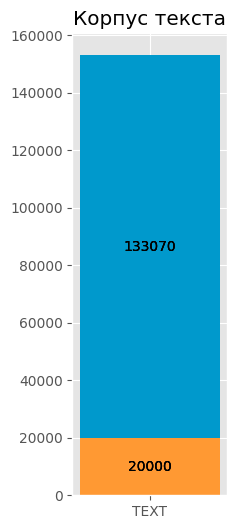

In [ ]:
# @title график 3
species = ('TEXT')
sex_counts = {
    'MAX_WORDS_COUNT': np.array([20_000]),
    'TOTAL': np.array([133_070]),
}
width = 0.6

fig, ax = plt.subplots(figsize=(2, 6))
bottom = np.zeros(3)

colors = {'MAX_WORDS_COUNT': '#ff9933', 'TOTAL': '#0099cc'}

for sex, sex_count in sex_counts.items():
    p = ax.bar(species, sex_count, width, label=sex, bottom=bottom, color=colors.get(sex, 'gray'))
    bottom += sex_count
    ax.bar_label(p, label_type='center', color='black')

ax.set_title('Корпус текста')

plt.show()



In [ ]:
# Проверка индекса слова в словаре
try:
    print('Интересующее слово имеет индекс:', tokenizer.word_index[input('Введите слово: ')])
except:
    print('Интересующего вас слова нет в словаре')

Введите слово: андрей
Интересующее слово имеет индекс: 114


А далее вы как раз преобразуете текст в чистую последовательность индексов по частоте
повторений слов. Вы это рассматривали немного раньше в занятии.

In [ ]:
# Преобразование обучающих и проверочных текстов в последовательность индексов согласно частотному словарю
with timex():
    seq_train = tokenizer.texts_to_sequences(train_text)
    seq_test = tokenizer.texts_to_sequences(test_text)

dict(zip(train_text[1].replace('\ufeff', '').split()[:10], seq_train[1][:10]))

Время обработки: 3.24 с


{'Всё': 142,
 'живое...': 2904,
 'Когда': 40,
 'я': 5,
 'выехал': 11721,
 'из': 22,
 'нашего': 513,
 'городишка': 1,
 'и': 2,
 'повернул': 1817}

Рассмотрите функцию вывода статистики по всем загруженным текстам –
`print_text_stats()`, которая:
1. Задает название выборки (параметр **title** – «обучающая» или «тестовая»).
2. Отдельно проходит по каждому тексту (параметр **texts**).
3. Проходит по сформированным последовательностям индексов слов (параметр **sequences**).
4. Выводит количество символов каждого текста (счетчик переменной **chars**).
5. Выводит количество слов каждого текста (счетчик переменной **words**).
6. Суммирует все символы и слова в каждой выборке целиком (последняя строка в
коде функции).

Обратите внимание на вывод функции.

In [ ]:
def print_text_stats(title, texts, sequences, class_labels=writers):
    chars = 0
    words = 0

    print(f'Статистика по {title} текстам:')

    for cls in range(len(class_labels)):
        print(f'{class_labels[cls]:<15} {len(texts[cls]):9} символов,{len(sequences[cls]):8} слов')
        chars += len(texts[cls])
        words += len(sequences[cls])

    print('----')
    print(f'{"В сумме":<15} {chars:9} символов,{words:8} слов\n')

# Пример использования
print_text_stats('обучающим', train_text, seq_train)
print_text_stats('тестовым', test_text, seq_test)


Статистика по обучающим текстам:
Булгаков          1765648 символов,  261465 слов
Клиффорд_Саймак   1609507 символов,  251502 слов
Макс Фрай         3700010 символов,  568533 слов
О. Генри          1049517 символов,  160607 слов
Рэй Брэдберри     1386454 символов,  214454 слов
Стругацкие        2042469 символов,  313012 слов
----
В сумме          11553605 символов, 1769573 слов

Статистика по тестовым текстам:
Булгаков           875042 символов,  132730 слов
Клиффорд_Саймак    318811 символов,   50360 слов
Макс Фрай         1278191 символов,  196731 слов
О. Генри           349662 символов,   53238 слов
Рэй Брэдберри      868673 символов,  132524 слов
Стругацкие         704846 символов,  108621 слов
----
В сумме           4395225 символов,  674204 слов



**Создание обучающей и проверочной выборок**

В этом разделе вам предстоит большая работа, но вы уже на финишной прямой!

Функция `split_sequence` поможет поделить одну общую последовательность
(параметр sequence) из индексов слов на то количество примеров, которые вы захотите
(параметр **win_size**) со сдвигом по всей выборке, равному размеру шага (параметр
**hop**). Вы делали то же с помощью вложенного в список цикла `for`, только теперь он
задан как результат работы функции. Кто знает, сколько раз вам придется к этому
прибегать, поэтому лучше сделать функцию!

Есть и вторая функция – `vectorize_sequence()`, которая полезна двумя операциями:

* деление общей последовательности на части с помощью функции
`split_sequence()`;

* формирование бинарных (содержащих только 0 и 1) последовательностей верных
ответов в соответствии с каждым примером для тренировочной и для тестовой
выборок (метод `to_categorical()`).

Тогда в результате использования `vectorize_sequence()` вы всегда получите два
готовых numpy-массива. Если подадите в функцию данные для обучения, то это будет
обучающая выборка и выборка ответов для нее. То же будет и в случае с формированием
массивов на основе тестовых данных.

In [ ]:
# Функция разбиения последовательности на отрезки скользящим окном
# На входе - последовательность индексов, размер окна, шаг окна
def split_sequence(sequence, win_size, hop):
    # Последовательность разбивается на части до последнего полного окна
    return [sequence[i:i + win_size] for i in range(0, len(sequence) - win_size + 1, hop)]


# Функция формирования выборок из последовательностей индексов
# формирует выборку отрезков и соответствующих им меток классов в виде one hot encoding
def vectorize_sequence(seq_list, win_size, hop):
    # В списке последовательности следуют в порядке их классов
    # Всего последовательностей в списке ровно столько, сколько классов
    ClassCount = len(seq_list)

    # Списки для исходных векторов и категориальных меток класса
    x, y = [], []

    # Для каждого класса:
    for cls in range(ClassCount):
        # Разбиение последовательности класса cls на отрезки
        vectors = split_sequence(seq_list[cls], win_size, hop)
        # Добавление отрезков в выборку
        x += vectors
        # Для всех отрезков класса cls добавление меток класса в виде OHE
        y += [utils.to_categorical(cls, ClassCount)] * len(vectors)

    # Возврат результатов как numpy-массивов
    return np.array(x), np.array(y)

Сформируйте выборки, посмотрите на их размер и заодно измерьте время выполнения
операции. Последнее может отличаться в зависимости от среды выполнения и мощностей
ПК:



---


**Разберём пример прохождения окнами с заданным шагом**



---


```python
def split_sequence(sequence, win_size, hop):
    # Последовательность разбивается на части до последнего полного окна
    return [sequence[i:i + win_size] for i in range(0, len(sequence) - win_size + 1, hop)]
```

In [ ]:
arr = np.arange(100)

In [ ]:
example = []
for i in range(0,len(arr),10):
  print(arr[i:i + 20])
  example.append(arr[i:i + 20])

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29]
[20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
[30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49]
[40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59]
[50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69]
[60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79]
[70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89]
[80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99]
[90 91 92 93 94 95 96 97 98 99]


In [ ]:
example = np.array(example)
print(example)

[array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19])
 array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
        27, 28, 29])
 array([20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
        37, 38, 39])
 array([30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46,
        47, 48, 49])
 array([40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56,
        57, 58, 59])
 array([50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66,
        67, 68, 69])
 array([60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76,
        77, 78, 79])
 array([70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86,
        87, 88, 89])
 array([80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96,
        97, 98, 99])
 array([90, 91, 92, 93, 94, 95, 96, 97, 98, 99])]


<ipython-input-36-13fa77eff1f1>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  example = np.array(example)


In [ ]:
example = []
for i in range(0,len(arr)-20+1,10):
  example.append(arr[i:i + 20])
example = np.array(example)

print(example)
print(example.shape)

[[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
 [10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29]
 [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
 [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49]
 [40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59]
 [50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69]
 [60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79]
 [70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89]
 [80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99]]
(9, 20)


In [ ]:
vec = split_sequence(arr, win_size=20, hop=10)
print(np.array(vec))
print()
print(vec)

[[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
 [10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29]
 [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
 [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49]
 [40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59]
 [50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69]
 [60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79]
 [70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89]
 [80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99]]

[array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19]), array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29]), array([20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39]), array([30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46,
       47, 48, 49]), array([40, 41, 42, 43, 44, 45, 46, 47, 48, 49,



---


**Разбор след функции:**


---


```python
# Функция формирования выборок из последовательностей индексов
# формирует выборку отрезков и соответствующих им меток классов в виде one hot encoding
def vectorize_sequence(seq_list, win_size, hop):
    # В списке последовательности следуют в порядке их классов
    # Всего последовательностей в списке ровно столько, сколько классов
    ClassCount = len(seq_list)

    # Списки для исходных векторов и категориальных меток класса
    x, y = [], []

    # Для каждого класса:
    for cls in range(ClassCount):
        # Разбиение последовательности класса cls на отрезки
        vectors = split_sequence(seq_list[cls], win_size, hop)
        # Добавление отрезков в выборку
        x += vectors
        # Для всех отрезков класса cls добавление меток класса в виде OHE
        y += [utils.to_categorical(cls, ClassCount)] * len(vectors)

    # Возврат результатов как numpy-массивов
    return np.array(x), np.array(y)
```

In [ ]:
x1 = []

vec = split_sequence(arr, win_size=20, hop=10)
x1 += vec

vec = split_sequence(arr, win_size=20, hop=10)
x1 += vec
x2 = np.array(x1)
print(x2)
print(x2.shape)

[[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
 [10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29]
 [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
 [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49]
 [40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59]
 [50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69]
 [60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79]
 [70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89]
 [80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99]
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
 [10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29]
 [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
 [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49]
 [40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59]
 [50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69]
 [60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77

In [ ]:
# Формирование обучающей и тестовой выборок
with timex():
    # Формирование обучающей выборки
    x_train, y_train = vectorize_sequence(seq_train, WIN_SIZE, WIN_HOP)
    # Формирование тестовой выборки
    x_test, y_test = vectorize_sequence(seq_test, WIN_SIZE, WIN_HOP)

    # Проверка формы сформированных данных
    print(x_train.shape, y_train.shape)
    print(x_test.shape, y_test.shape)

(17640, 1000) (17640, 6)
(6686, 1000) (6686, 6)
Время обработки: 1.89 с


Один из примеров последовательности индексов для обучения сети выглядит так:

In [ ]:
# Вывод отрезка индексов тренировочной выборки
print(y_train[0])
print(len(x_train[0]), end='\n\n')
print(x_train[0][:100])
print(x_train.shape)

[1. 0. 0. 0. 0. 0.]
1000

[ 2927  5383     1  1496     1     1 15510  1511   353  8288  1255     2
   121 14307     1     1   675 11508 10220 17013     3   275  1066  4725
   637     1     8     1  6482    15  2782    47     1  1181     1  1636
     1  1540     1  7010     2     1    94  3211   930    17     1     3
  5197 18830     8  3906   532  5765    43   488     2  8682   488    17
     1     1  2692    31   505    26  4242   548  2381    43     9     1
  2834  3437    10     1  4591     2   597  1966     3  1217   800   392
  1829  4592     1     1     1     2  2298 18831  4243  2989    14   839
     2     3 18832     2]
(17640, 1000)


Сформируйте отдельные обучающую и тестовую выборки в формате Bag Of Words, чтобы
в дальнейшем использовать оба способа обработки текстов при обучении НС. И узнайте
время выполнения этих двух операций:

In [ ]:
# Формирование выборок текстов в виде разреженных матриц (bag of words)
with timex():
    # На входе .sequences_to_matrix() ожидает список, .tolist() выполняет преобразование типа
    x_train_01 = tokenizer.sequences_to_matrix(x_train.tolist())
    x_test_01 = tokenizer.sequences_to_matrix(x_test.tolist())

    # Вывод формы обучающей выборки в виде разреженной матрицы Bag of Words
    print(x_train_01.shape)
    # Вывод фрагмента отрезка обучающего текста в виде Bag of Words
    print(x_train_01[0][0:100])

(17640, 20000)
[0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0.
 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1.
 0. 1. 1. 0.]
Время обработки: 21.82 с


In [ ]:
x_train_01[0].shape

(20000,)

##Различные архитектуры нейронных сетей для классификации текста

###Сервисные функции


Пусть код ниже не вводит вас в ступор, там просто добавлена пара созданных функций
для удобства компиляции и обучения модели. Именно это и будет делать функция под
именем `compile_train_model()`. В ее параметры вы передадите все, что
необходимо для компиляции и обучения:

● саму модель НС;

● выборки;

● функцию оптимизации;

● количество эпох обучения;

● размер шага по выборке;

● размер полотна графика.

Да, функция даже нарисует для вас графики точности и ошибки сети! Не зря вы
познакомились с библиотекой matplotlib (блок кода по отрисовке графиков последний в
данной функции).

Также в ячейке ниже написана функция `eval_model()`. Она оценивает точность работы
сети при распознавании текстов, дает статистику по верно и неверно распознанным
классам, и рисует график-матрицу ошибки предсказания сети! Это очень красивый
график, похожий на яркую шахматную доску. Как его правильно читать, вы узнаете чуть
позже.

Последняя функция `compile_train_eval_model()` объединяет в себе функционал
двух предыдущих. Ей вы и будете пользоваться, чтобы в будущем строить разные
архитектуры, при этом в одну строку задавая компиляцию модели, обучение и оценку
точности!

In [ ]:
# Функция компиляции и обучения модели нейронной сети
def compile_train_model(model,
                        x_train,
                        y_train,
                        x_val,
                        y_val,
                        optimizer='adam',
                        epochs=50,
                        batch_size=128,
                        figsize=(20, 5)):

    # Компиляция модели
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # Вывод сводки
    model.summary()

    # Обучение модели с заданными параметрами
    history = model.fit(x_train,
                        y_train,
                        epochs=epochs,
                        batch_size=batch_size,
                        validation_data=(x_val, y_val))

    # Вывод графиков точности и ошибки
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
    fig.suptitle('График процесса обучения модели')
    ax1.plot(history.history['accuracy'],
               label='Доля верных ответов на обучающем наборе')
    ax1.plot(history.history['val_accuracy'],
               label='Доля верных ответов на проверочном наборе')
    ax1.xaxis.get_major_locator().set_params(integer=True)#Целочисленные координаты оси абсцисс установлены
    ax1.set_xlabel('Эпоха обучения')
    ax1.set_ylabel('Доля верных ответов')
    ax1.legend()

    ax2.plot(history.history['loss'],
               label='Ошибка на обучающем наборе')
    ax2.plot(history.history['val_loss'],
               label='Ошибка на проверочном наборе')
    ax2.xaxis.get_major_locator().set_params(integer=True)
    ax2.set_xlabel('Эпоха обучения')
    ax2.set_ylabel('Ошибка')
    ax2.legend()
    plt.show()


# Функция вывода результатов оценки модели на заданных данных
def eval_model(model, x, y_true,
               class_labels=[],
               cm_round=3,
               title='',
               figsize=(10, 10)):
    plt.style.use('default')
    # Вычисление предсказания сети
    y_pred = model.predict(x)
    # Построение матрицы ошибок
    cm = confusion_matrix(np.argmax(y_true, axis=1),
                          np.argmax(y_pred, axis=1),
                          normalize='true')
    # Округление значений матрицы ошибок
    cm = np.around(cm, cm_round)

    # Отрисовка матрицы ошибок
    fig, ax = plt.subplots(figsize=figsize)
    ax.set_title(f'Нейросеть {title}: матрица ошибок нормализованная', fontsize=18)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
    disp.plot(ax=ax)
    plt.gca().images[-1].colorbar.remove()  # Стирание ненужной цветовой шкалы
    plt.xlabel('Предсказанные классы', fontsize=16)
    plt.ylabel('Верные классы', fontsize=16)
    fig.autofmt_xdate(rotation=45)          # Наклон меток горизонтальной оси при необходимости
    plt.show()

    print('-'*100)
    print(f'Нейросеть: {title}')

    # Для каждого класса:
    for cls in range(len(class_labels)):
        # Определяется индекс класса с максимальным значением предсказания (уверенности)
        cls_pred = np.argmax(cm[cls])
        # Формируется сообщение о верности или неверности предсказания
        msg = 'ВЕРНО :-)' if cls_pred == cls else 'НЕВЕРНО :-('
        # Выводится текстовая информация о предсказанном классе и значении уверенности
        print('Класс: {:<20} {:3.0f}% сеть отнесла к классу {:<20} - {}'.format(class_labels[cls],
                                                                               100. * cm[cls, cls_pred],
                                                                               class_labels[cls_pred],
                                                                               msg))

    # Средняя точность распознавания определяется как среднее диагональных элементов матрицы ошибок
    print('\nСредняя точность распознавания: {:3.0f}%'.format(100. * cm.diagonal().mean()))


# Совместная функция обучения и оценки модели нейронной сети
def compile_train_eval_model(model,
                             x_train,
                             y_train,
                             x_test,
                             y_test,
                             class_labels=writers,
                             title='',
                             optimizer='adam',
                             epochs=50,
                             batch_size=128,
                             graph_size=(20, 5),
                             cm_size=(10, 10)):

    # Компиляция и обучение модели на заданных параметрах
    # В качестве проверочных используются тестовые данные
    compile_train_model(model,
                        x_train, y_train,
                        x_test, y_test,
                        optimizer=optimizer,
                        epochs=epochs,
                        batch_size=batch_size,
                        figsize=graph_size)

    # Вывод результатов оценки работы модели на тестовых данных
    eval_model(model, x_test, y_test,
               class_labels=class_labels,
               title=title,
               figsize=cm_size)

### BagOfWords


Попробуйте способ обучения сети на Bag Of Words. Сеть будет угадывать одного из
шести авторов для каждого примера текста. На выходном слое нужно указать
функцию активации `softmax`.

Соберите полносвязную модель, подобную той, что вы уже рассматривали на первом
занятии по НС. А на обучение и тест сети подайте выборки формата Bag Of Words
(**x_train_01** и **x_test_01**), которые вы подготовили ранее.

Функция `compile_train_eval_model()` также выведет статистику по
сформированной модели до начала обучения. Смотрите:

In [ ]:
MAX_WORDS_COUNT

20000

In [ ]:
ClassCount

6

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 200)               4000200   
                                                                 
 dropout (Dropout)           (None, 200)               0         
                                                                 
 batch_normalization (Batch  (None, 200)               800       
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 6)                 1206      
                                                                 
Total params: 4002206 (15.27 MB)
Trainable params: 4001806 (15.27 MB)
Non-trainable params: 400 (1.56 KB)
_________________________________________________________________
Epoch 1/50
138/138 [==============================] - 8s 26ms/step - loss: 0.0518 

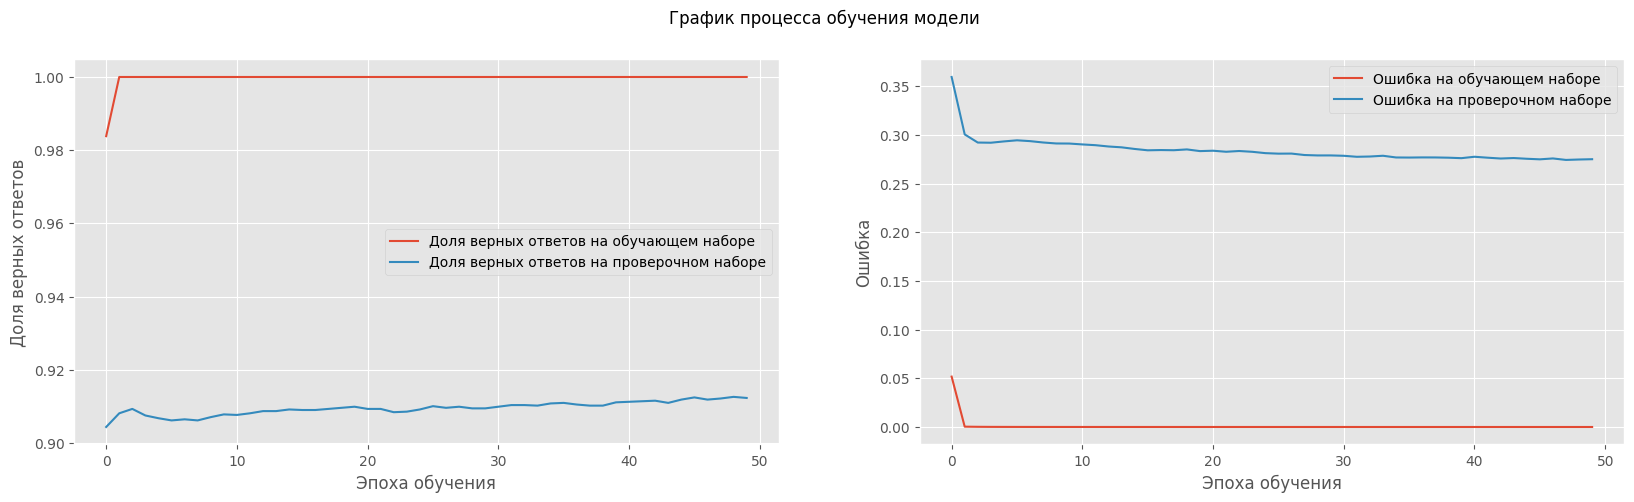

209/209 [==============================] - 1s 2ms/step


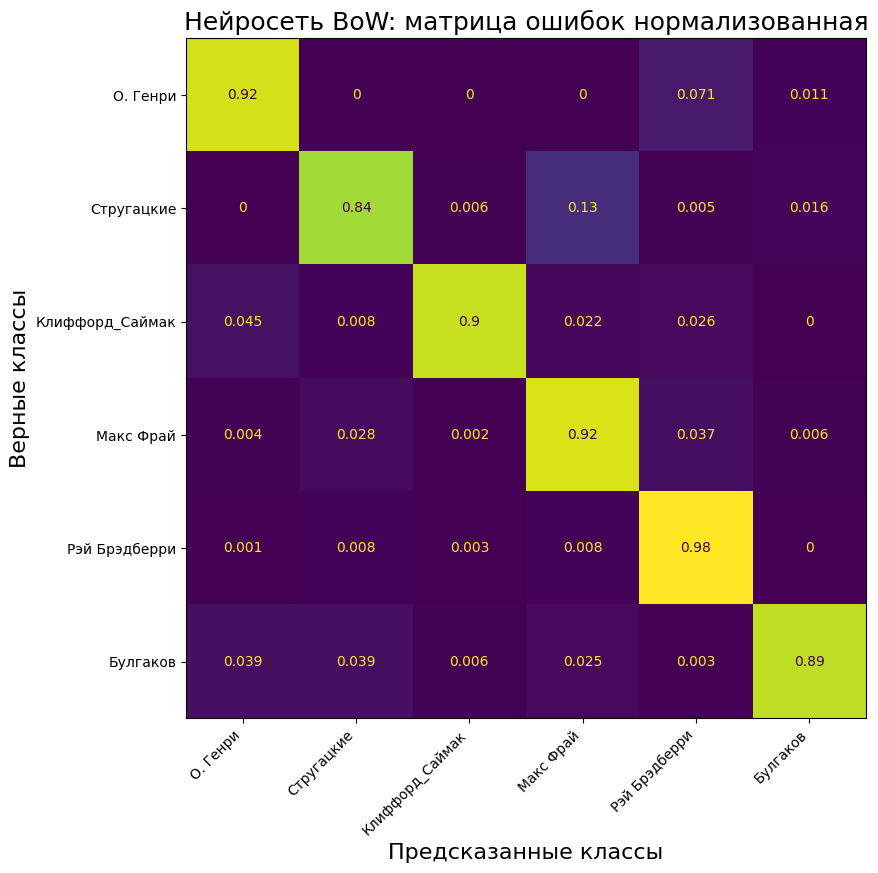

----------------------------------------------------------------------------------------------------
Нейросеть: BoW
Класс: О. Генри              92% сеть отнесла к классу О. Генри             - ВЕРНО :-)
Класс: Стругацкие            84% сеть отнесла к классу Стругацкие           - ВЕРНО :-)
Класс: Клиффорд_Саймак       90% сеть отнесла к классу Клиффорд_Саймак      - ВЕРНО :-)
Класс: Макс Фрай             92% сеть отнесла к классу Макс Фрай            - ВЕРНО :-)
Класс: Рэй Брэдберри         98% сеть отнесла к классу Рэй Брэдберри        - ВЕРНО :-)
Класс: Булгаков              89% сеть отнесла к классу Булгаков             - ВЕРНО :-)

Средняя точность распознавания:  91%


In [ ]:
# Создание последовательной модели нейросети
model_text_bow_softmax = Sequential()
# Первый полносвязный слой
model_text_bow_softmax.add(Dense(200, input_dim=MAX_WORDS_COUNT, activation="relu"))
# Слой регуляризации Dropout
model_text_bow_softmax.add(Dropout(0.25))
# Слой пакетной нормализации
model_text_bow_softmax.add(BatchNormalization())
# Выходной полносвязный слой
model_text_bow_softmax.add(Dense(ClassCount, activation='softmax'))

# Входные данные подаются в виде векторов bag of words
compile_train_eval_model(model_text_bow_softmax,
                         x_train_01, y_train,
                         x_test_01, y_test,
                         class_labels=writers,
                         title='BoW')

**Выводы по итогам обучения модели BagOfWords**

По информации на эпохах и по графикам процесса обучения вы можете увидеть, что уже
со второй эпохи доля верных ответов и ошибка на обучающей выборке выходят на плато,
т.е. достигают предела в обучении и больше не меняются. На проверочной выборке
точность имеет тенденцию к легкому росту, а ошибка – к едва заметному снижению. В
целом получился хороший результат, и функция сообщает вам, что точность
распознавания текстов данной НС – 91%.

А как же прочесть график-матрицу, демонстрирующий точность сети? По вертикали даны
верные имена авторов, а по горизонтали – предсказанные имена. В сети с хорошей
точностью вы должны видеть яркую диагональ из верхнего левого угла в нижний правый,
в значениях которой будут дробные числа, близкие к единице. Это характеризует
точность предсказанных результатов. Именно такой исход вы и наблюдаете на графике-
матрице ошибок по данной модели!

Пример сохранения модели в файл для дальнейшего использования:

In [ ]:
# Сохранение полной модели (архитектуры слоев и весов каждого слоя)
# Для чтения модели используется метод keras.models.load_model()
model_text_bow_softmax.save('model_text_bow_softmax.keras')

Наконец-то! Вы добрались до экспериментов со слоем Embedding. Как вы помните, этот
слой создает из каждого индекса слова отдельный вектор числовых значений, размер
которого равен параметру, указываемому при создании слоя в архитектуре.

Первая модель Embedding создаст для каждого слова в выборке вектор из 20 значений. Размер вектора, который создает слой, указывается в параметре **output_dim**.
Это довольно малый размер, сеть обучится быстро, но и точность может оказаться
невысокой. Параметр **input_dim** указывает количество уникальных значений (токенов), который данных слой будет способен обработать (если мы установим значение input_dim = N и подадим токен больше чем N, этот слой выдаст ошибку, по скольку у него не будут нужные веса для обработки этого токена).

Для работы с Embedding вы подадите выборки, созданные до преобразования
в Bag Of Words – просто **x_train** и **x_test**:

### Embedding + Dense: размерность эмбеддингов 20

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1000, 20)          400000    
                                                                 
 spatial_dropout1d (Spatial  (None, 1000, 20)          0         
 Dropout1D)                                                      
                                                                 
 flatten (Flatten)           (None, 20000)             0         
                                                                 
 batch_normalization_1 (Bat  (None, 20000)             80000     
 chNormalization)                                                
                                                                 
 dense_2 (Dense)             (None, 200)               4000200   
                                                                 
 dropout_1 (Dropout)         (None, 200)              

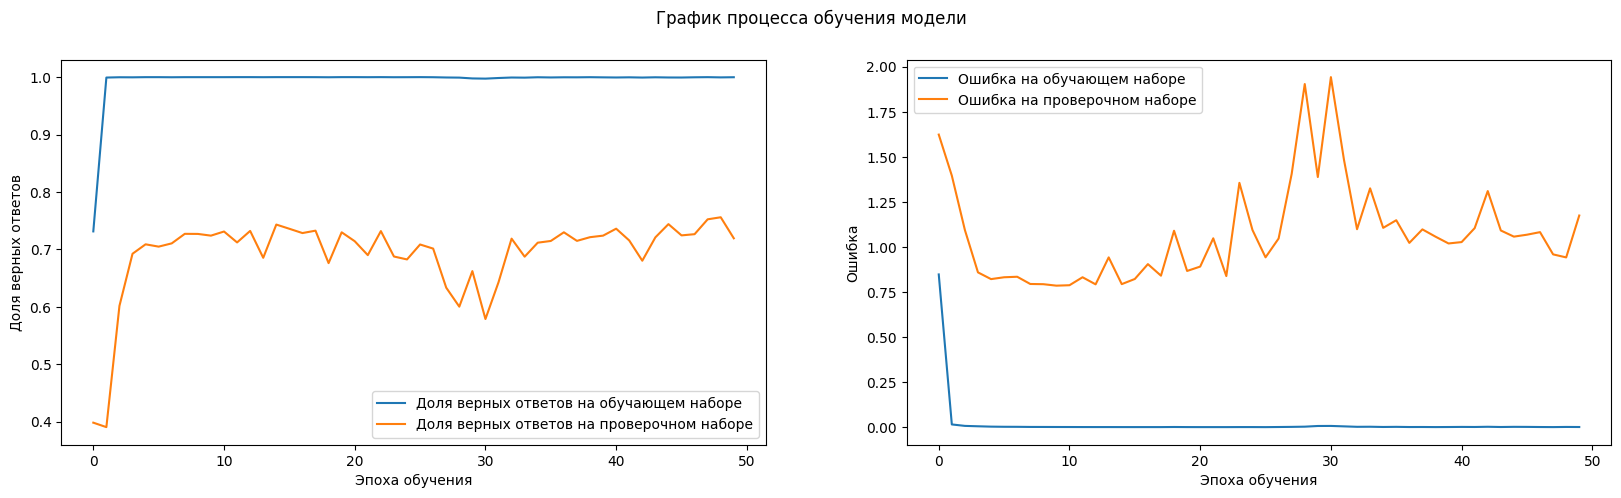

209/209 [==============================] - 0s 2ms/step


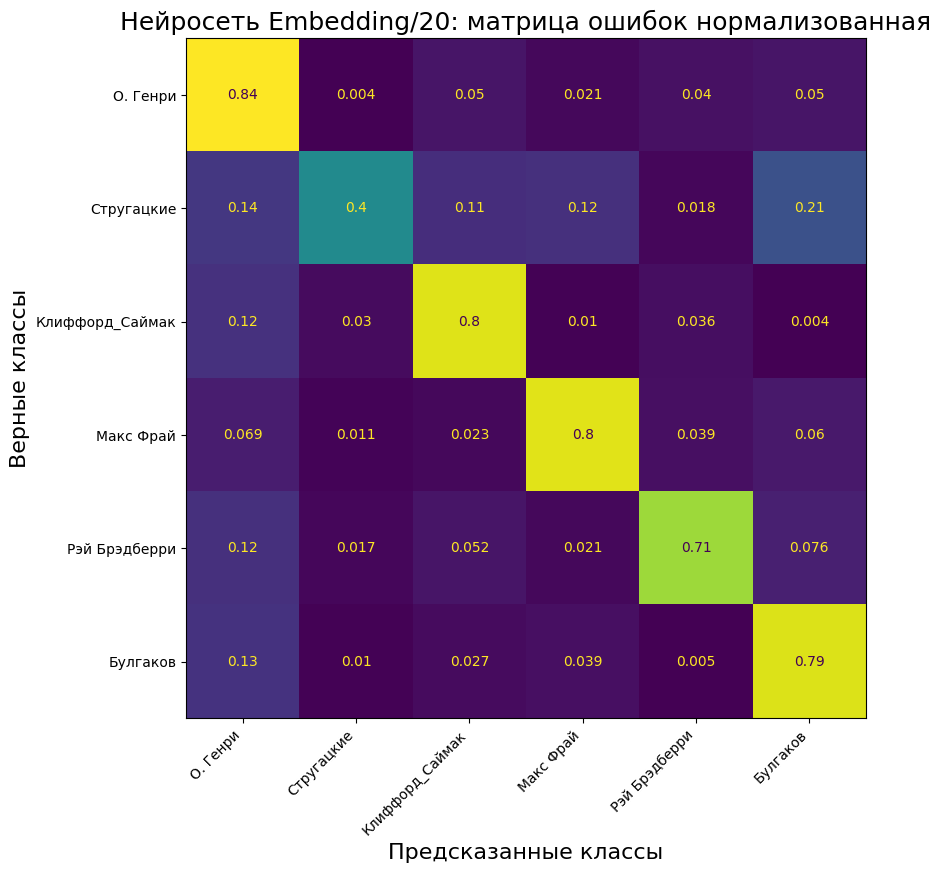

----------------------------------------------------------------------------------------------------
Нейросеть: Embedding/20
Класс: О. Генри              84% сеть отнесла к классу О. Генри             - ВЕРНО :-)
Класс: Стругацкие            40% сеть отнесла к классу Стругацкие           - ВЕРНО :-)
Класс: Клиффорд_Саймак       80% сеть отнесла к классу Клиффорд_Саймак      - ВЕРНО :-)
Класс: Макс Фрай             80% сеть отнесла к классу Макс Фрай            - ВЕРНО :-)
Класс: Рэй Брэдберри         72% сеть отнесла к классу Рэй Брэдберри        - ВЕРНО :-)
Класс: Булгаков              79% сеть отнесла к классу Булгаков             - ВЕРНО :-)

Средняя точность распознавания:  72%


In [ ]:
# Архитектура со слоем Embedding и регуляризацией
model_text_emb_20 = Sequential()
model_text_emb_20.add(Embedding(input_dim = MAX_WORDS_COUNT, output_dim = 20, input_length=WIN_SIZE))
model_text_emb_20.add(SpatialDropout1D(0.2))
model_text_emb_20.add(Flatten())
model_text_emb_20.add(BatchNormalization())
model_text_emb_20.add(Dense(200, activation="relu"))
model_text_emb_20.add(Dropout(0.2))
model_text_emb_20.add(BatchNormalization())
model_text_emb_20.add(Dense(ClassCount, activation='softmax'))

# Входные данные подаются в виде последовательностей индексов,
# а не векторов bag of words
compile_train_eval_model(model_text_emb_20,
                         x_train, y_train,
                         x_test, y_test,
                         class_labels=writers,
                         title='Embedding/20')

**Выводы по итогам обучения модели Embedding(20) + Dense**

Посмотрите на графики и данные по эпохам. Точность и ошибка на проверочном наборе
нарисовали пилу, хотя на обучающем по-прежнему полный штиль. Однако график
матрицы ошибок не даст вам себя обмануть: вы видите, как изменилась тональность на
диагонали и как упали значения точности. И правда, на последней эпохе сеть дала
точность распознавания 72%. Результат модели Embedding пока что сильно уступает Bag
Of Words.

Посмотрите, как изменится точность, если увеличить размер Embedding-пространства до
200, а также добавить новый слой одномерной регуляризации SpatialDropout1D.

### Embedding + Dense: размерность эмбеддингов **200**

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 1000, 200)         4000000   
                                                                 
 spatial_dropout1d_1 (Spatia  (None, 1000, 200)        0         
 lDropout1D)                                                     
                                                                 
 flatten_1 (Flatten)         (None, 200000)            0         
                                                                 
 batch_normalization_3 (Batc  (None, 200000)           800000    
 hNormalization)                                                 
                                                                 
 dense_4 (Dense)             (None, 200)               40000200  
                                                                 
 dropout_2 (Dropout)         (None, 200)              

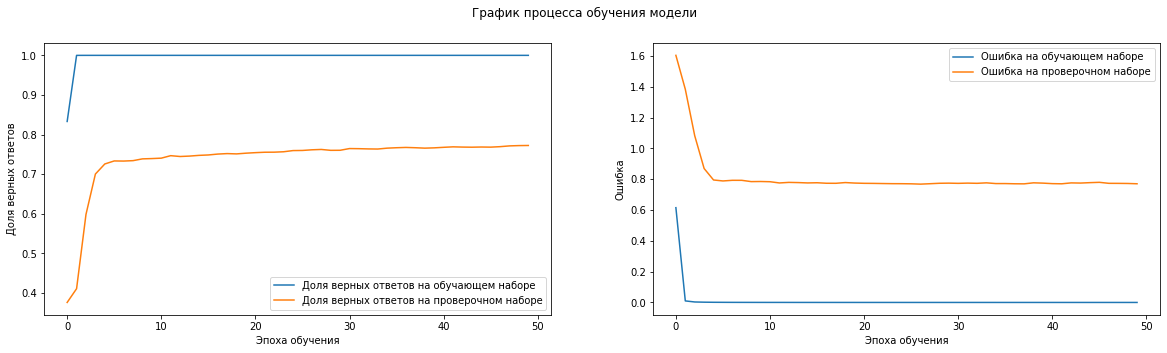

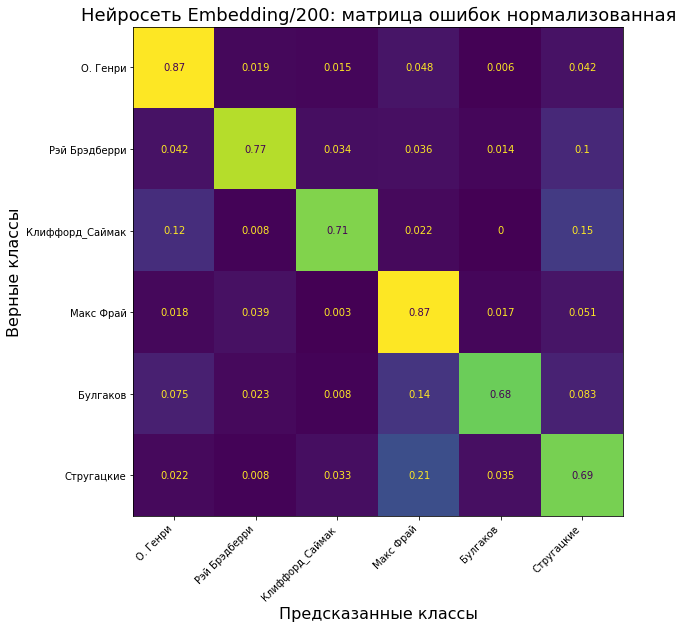

----------------------------------------------------------------------------------------------------
Нейросеть: Embedding/200
Класс: О. Генри              87% сеть отнесла к классу О. Генри             - ВЕРНО :-)
Класс: Рэй Брэдберри         77% сеть отнесла к классу Рэй Брэдберри        - ВЕРНО :-)
Класс: Клиффорд_Саймак       71% сеть отнесла к классу Клиффорд_Саймак      - ВЕРНО :-)
Класс: Макс Фрай             87% сеть отнесла к классу Макс Фрай            - ВЕРНО :-)
Класс: Булгаков              68% сеть отнесла к классу Булгаков             - ВЕРНО :-)
Класс: Стругацкие            69% сеть отнесла к классу Стругацкие           - ВЕРНО :-)

Средняя точность распознавания:  76%


In [ ]:
#Создаём сеть с Embedding слоем
model_text_emb_200 = Sequential()
model_text_emb_200.add(Embedding(MAX_WORDS_COUNT, 200, input_length=WIN_SIZE))
model_text_emb_200.add(SpatialDropout1D(0.2))
model_text_emb_200.add(Flatten())
model_text_emb_200.add(BatchNormalization())
model_text_emb_200.add(Dense(200, activation="relu"))
model_text_emb_200.add(Dropout(0.2))
model_text_emb_200.add(BatchNormalization())
model_text_emb_200.add(Dense(ClassCount, activation='softmax'))

compile_train_eval_model(model_text_emb_200,
                         x_train, y_train,
                         x_test, y_test,
                         class_labels=writers,
                         title='Embedding/200')

**Вывод по данной модели** – везде плато на графиках, что нехорошо, и скорее всего модель
столкнулась с переобучением. По сравнению с предыдущей моделью точность
распознавания выросла на 5%, но это все равно гораздо меньше, чем точности при
подходе с Bag Of Words. Похоже, что «мешок слов» – оптимальный способ решения
задачи по классификации текстов?

Дайте Embedding-модели еще один шанс, убрав при этом слои регуляризации из
архитектуры.

### Embedding + Dense: размерность эмбеддингов **200** без слоев регуляризации **SpatialDropout1D, Droupout**

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 1000, 200)         4000000   
                                                                 
 flatten_2 (Flatten)         (None, 200000)            0         
                                                                 
 batch_normalization_5 (Batc  (None, 200000)           800000    
 hNormalization)                                                 
                                                                 
 dense_6 (Dense)             (None, 200)               40000200  
                                                                 
 batch_normalization_6 (Batc  (None, 200)              800       
 hNormalization)                                                 
                                                                 
 dense_7 (Dense)             (None, 6)                

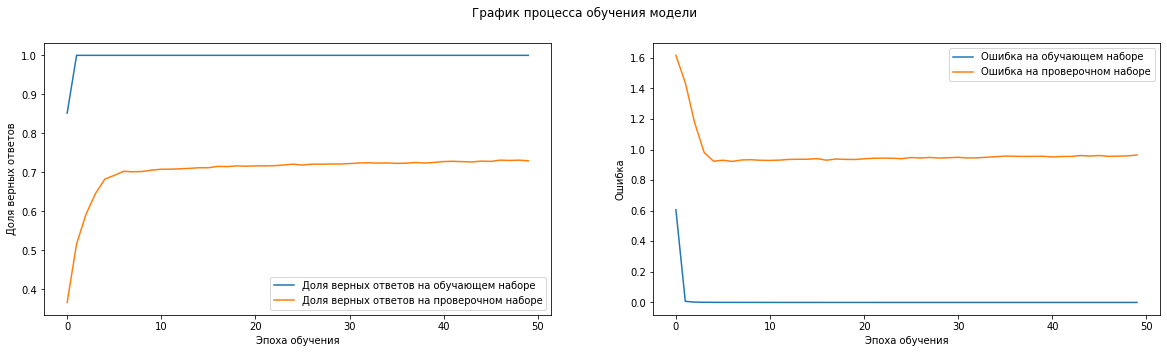

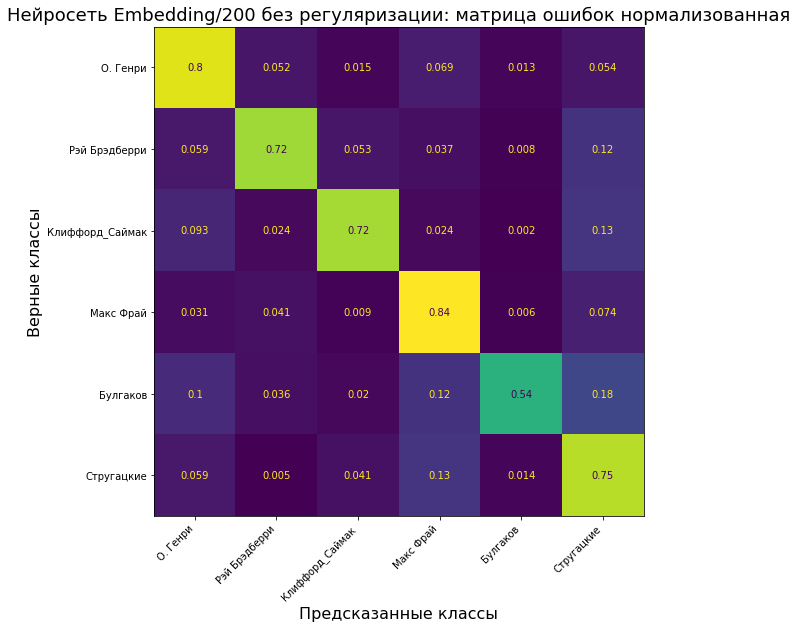

----------------------------------------------------------------------------------------------------
Нейросеть: Embedding/200 без регуляризации
Класс: О. Генри              80% сеть отнесла к классу О. Генри             - ВЕРНО :-)
Класс: Рэй Брэдберри         72% сеть отнесла к классу Рэй Брэдберри        - ВЕРНО :-)
Класс: Клиффорд_Саймак       72% сеть отнесла к классу Клиффорд_Саймак      - ВЕРНО :-)
Класс: Макс Фрай             84% сеть отнесла к классу Макс Фрай            - ВЕРНО :-)
Класс: Булгаков              54% сеть отнесла к классу Булгаков             - ВЕРНО :-)
Класс: Стругацкие            75% сеть отнесла к классу Стругацкие           - ВЕРНО :-)

Средняя точность распознавания:  73%


In [ ]:
#Создаём сеть с Embedding слоем
model_text_emb_200_nr = Sequential()
model_text_emb_200_nr.add(Embedding(MAX_WORDS_COUNT, 200, input_length=WIN_SIZE))
model_text_emb_200_nr.add(Flatten())
model_text_emb_200_nr.add(BatchNormalization())
model_text_emb_200_nr.add(Dense(200, activation="relu"))
model_text_emb_200_nr.add(BatchNormalization())
model_text_emb_200_nr.add(Dense(ClassCount, activation='softmax'))

compile_train_eval_model(model_text_emb_200_nr,
                         x_train, y_train,
                         x_test, y_test,
                         class_labels=writers,
                         epochs=50,
                         title='Embedding/200 без регуляризации')

Увы! Точность последней модели совпала с точностью первой Embedding-сети, хотя
параметр размера пространства здесь численно выше в 10 раз. Пусть 73% не самый
плохой результат, но и графики обучения, и статистика по эпохам значительно уступают
Bag Of Words-модели. Хорошо, что AI-разработчики придумали несколько подходов для
задач по обработке текстов! То, что один подход сейчас лучше работает не означает, что
он будет работать так же для любой задачи. Поэтому не забывайте экспериментировать, и
тогда каждый подход найдет свою область применения!